# Programming Assignment: Градиентный бустинг своими руками

## Введение

В этом задании будет использоваться датасет boston из sklearn.datasets. Оставьте последние 25% объектов для контроля качества, разделив X и y на X_train, y_train и X_test, y_test.

Целью задания будет реализовать простой вариант градиентного бустинга над регрессионными деревьями для случая квадратичной функции потерь.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import model_selection, datasets

import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = datasets.load_boston(return_X_y = True)

print('X shape: {} \nY shape: {}'.format(X.shape, y.shape))

X shape: (506, 13) 
Y shape: (506,)


In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 14)

print('X Train shape: {} \nY Train shape: {} \nCheck: {}'.format(X_train.shape, y_train.shape, 
                                                                  np.round(X_train.shape[0]/X.shape[0], 2)))

X Train shape: (379, 13) 
Y Train shape: (379,) 
Check: 0.75


## Задание 4

Градиентный бустинг над деревьями - очень популярен в машинном обучении. Он представлен как в самой библиотеке sklearn, так и в сторонней библиотеке XGBoost, которая имеет свой питоновский интерфейс. На практике XGBoost работает заметно лучше GradientBoostingRegressor из sklearn, но для этого задания вы можете использовать любую реализацию.

Исследуйте, переобучается ли градиентный бустинг с ростом числа итераций (и подумайте, почему), а также с ростом глубины деревьев. На основе наблюдений выпишите через пробел номера правильных из приведенных ниже утверждений в порядке возрастания номера (это будет ответ в п.4):

<b>1. С увеличением числа деревьев, начиная с некоторого момента, качество работы градиентного бустинга не меняется существенно.</b>

**4. С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга перестает существенно изменяться.**

In [7]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
#conda install py-xgboost

In [8]:
def scores_plot(model, params, title):    
    plt.plot(params, -model.cv_results_['mean_train_score'], color = 'blue', label = 'Train')
    plt.plot(params, -model.cv_results_['mean_test_score'], color = 'red', label = 'Test')
    plt.xlabel('Параметр')
    plt.ylabel('MSE')
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.show()

In [9]:
n_trees = np.arange(10, 100, 10)
depth = np.arange(1, 11) 
cv = 5

xgb_model = xgb.XGBRegressor()

In [10]:
%%time

xgb_ntrees = GridSearchCV(xgb_model,
                         {'n_estimators': n_trees},
                         scoring = 'neg_mean_squared_error',
                         cv = cv)

xgb_ntrees.fit(X, y)

Wall time: 708 ms


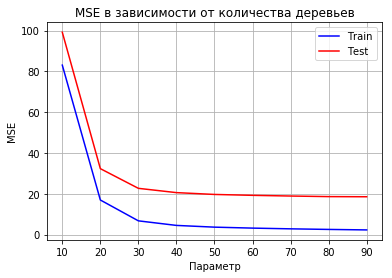

In [11]:
scores_plot(xgb_ntrees, n_trees, 'MSE в зависимости от количества деревьев')

In [12]:
%%time

xgb_depth = GridSearchCV(xgb_model,
                         {'max_depth': depth},
                         scoring = 'neg_mean_squared_error',
                         cv = cv)

xgb_depth.fit(X, y)

Wall time: 2.47 s


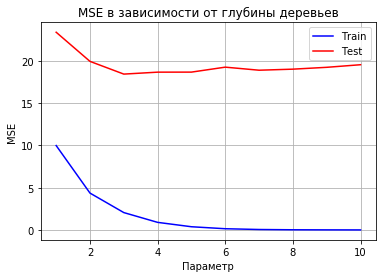

In [13]:
scores_plot(xgb_depth, depth, 'MSE в зависимости от глубины деревьев')

## Задание 5

Сравните получаемое с помощью градиентного бустинга качество с качеством работы линейной регрессии.

Для этого обучите LinearRegression из sklearn.linear_model (с параметрами по умолчанию) на обучающей выборке и оцените для прогнозов полученного алгоритма на тестовой выборке RMSE. Полученное качество - ответ в пункте 5.

В данном примере качество работы простой модели должно было оказаться хуже, но не стоит забывать, что так бывает не всегда. В заданиях к этому курсу вы еще встретите пример обратной ситуации.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [15]:
params = {'n_estimators': np.arange(90, 115, 5), 'max_depth': np.arange(1, 6)}

In [16]:
%%time

xgb_best = GridSearchCV(xgb_model,
                         params,
                         scoring = 'neg_mean_squared_error',
                         cv = cv)

xgb_best.fit(X, y)

Wall time: 3.36 s


In [18]:
print('RMSE on Test sample \nLinear Regression:', round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
     '\nXGBoost:', round(np.sqrt(-xgb_best.best_score_), 2))

RMSE on Test sample 
Linear Regression: 5.41 
XGBoost: 4.28
